In this notebook we will be trying to create a Recurrent Neural Net Model from scratch using PyTorch.

This is my attempt to understand implement RNN

Task is to give nationality of a person when name is provided

## Lets Download the Dataset

In [144]:
import torch


In [145]:
_ = torch.manual_seed(50)  #this will ensure that random numbers generated by torch will be reproducible when you run the notebook again

In [146]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Lets print the labels/nationalities in our dataset

In [147]:
import os

In [148]:
dir = r"/content/data/names"
nations = [name.split(".")[0] for name in os.listdir(dir)]
nations

['Scottish',
 'Greek',
 'English',
 'Irish',
 'Japanese',
 'French',
 'Portuguese',
 'Polish',
 'German',
 'Italian',
 'Russian',
 'Chinese',
 'Arabic',
 'Spanish',
 'Korean',
 'Dutch',
 'Czech',
 'Vietnamese']

Encoding the languages as tensor

In [149]:
lang2label = {}
for i, label in enumerate(nations):
  lang2label[label] = torch.tensor([i], dtype=torch.long)

In [150]:
lang2label

{'Scottish': tensor([0]),
 'Greek': tensor([1]),
 'English': tensor([2]),
 'Irish': tensor([3]),
 'Japanese': tensor([4]),
 'French': tensor([5]),
 'Portuguese': tensor([6]),
 'Polish': tensor([7]),
 'German': tensor([8]),
 'Italian': tensor([9]),
 'Russian': tensor([10]),
 'Chinese': tensor([11]),
 'Arabic': tensor([12]),
 'Spanish': tensor([13]),
 'Korean': tensor([14]),
 'Dutch': tensor([15]),
 'Czech': tensor([16]),
 'Vietnamese': tensor([17])}

Encoding the names as a tensor

Remove any symbols present in names

In [151]:
!pip install unidecode

In [152]:
from unidecode import unidecode

In [153]:
def decode_name(name):
  return unidecode(name)

In [154]:
from string import ascii_letters
total_letters = len(ascii_letters) + len(" .,:;-'")
vocabulary = {}
for id_, char in enumerate(ascii_letters+ " .,:;-'"):
  vocabulary[char] = id_

In [155]:
def name_tensor(name:str, vocabulary:dict):
  """
  Convert the name to a tensor
  """
  total_letters = len(vocabulary)
  tensor = torch.zeros(len(name), 1, total_letters) #Given shape it'll fill that tensor with zeroes
  for i, char in enumerate(name):
    tensor[i][0][vocabulary[char]] = 1
  print(tensor.shape)
  return tensor


In [156]:
tensor = name_tensor("Farshana", vocabulary)
print(tensor[0])

torch.Size([8, 1, 59])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.]])


In [157]:
all_names = []
all_lang = []
for file in os.listdir(dir):
  with open(os.path.join(dir, file)) as f:
    lang = file.split(".")[0]
    names = [decode_name(name.replace("\n", "")) for name in f.readlines()]

    for name in names:
      try:
        all_names.append(name_tensor(name,vocabulary))
        all_lang.append(lang2label[lang])
      except:
        pass






Streaming output truncated to the last 5000 lines.
torch.Size([17, 1, 59])
torch.Size([17, 1, 59])
torch.Size([17, 1, 59])
torch.Size([17, 1, 59])
torch.Size([17, 1, 59])
torch.Size([17, 1, 59])
torch.Size([17, 1, 59])
torch.Size([17, 1, 59])
torch.Size([17, 1, 59])
torch.Size([17, 1, 59])
torch.Size([17, 1, 59])
torch.Size([6, 1, 59])
torch.Size([8, 1, 59])
torch.Size([7, 1, 59])
torch.Size([6, 1, 59])
torch.Size([10, 1, 59])
torch.Size([9, 1, 59])
torch.Size([5, 1, 59])
torch.Size([7, 1, 59])
torch.Size([6, 1, 59])
torch.Size([8, 1, 59])
torch.Size([6, 1, 59])
torch.Size([6, 1, 59])
torch.Size([4, 1, 59])
torch.Size([8, 1, 59])
torch.Size([4, 1, 59])
torch.Size([7, 1, 59])
torch.Size([8, 1, 59])
torch.Size([8, 1, 59])
torch.Size([6, 1, 59])
torch.Size([4, 1, 59])
torch.Size([5, 1, 59])
torch.Size([4, 1, 59])
torch.Size([7, 1, 59])
torch.Size([7, 1, 59])
torch.Size([5, 1, 59])
torch.Size([9, 1, 59])
torch.Size([5, 1, 59])
torch.Size([8, 1, 59])
torch.Size([9, 1, 59])
torch.Size([5, 1,

## Lets split the dataset to train and test!

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
train_ind, test_ind = train_test_split(range(len(all_lang)), test_size=0.1, shuffle=True, stratify=all_lang)

In [160]:
print(train_ind)
print(test_ind)

[14529, 15259, 9047, 4040, 2276, 16616, 12800, 10986, 5924, 164, 15977, 10605, 10912, 1312, 10340, 2246, 3354, 7156, 7826, 2759, 19375, 20041, 10595, 2111, 8751, 13748, 1306, 2490, 11036, 7346, 18772, 19805, 18350, 6635, 8207, 14314, 2392, 3388, 12541, 7684, 11715, 15347, 18413, 15612, 17696, 7407, 893, 3652, 11851, 9502, 7942, 12455, 921, 2140, 13053, 9930, 2414, 11211, 9720, 13358, 14258, 14710, 9311, 15398, 15988, 251, 8782, 16693, 12928, 15877, 16697, 15574, 8724, 3785, 285, 14093, 8242, 14025, 14376, 11628, 8977, 15549, 6184, 17496, 13237, 4847, 466, 12665, 18012, 5079, 12614, 13187, 3934, 806, 6857, 4187, 15598, 146, 8534, 15616, 13540, 18108, 12476, 11609, 5243, 20057, 5467, 3736, 19916, 8891, 11988, 9409, 16457, 11519, 375, 218, 17220, 3073, 15532, 16577, 19109, 13746, 11574, 4539, 18111, 15201, 5560, 5147, 18921, 7251, 5619, 18699, 941, 11590, 13400, 15810, 453, 13658, 3647, 5887, 11126, 14437, 970, 10541, 16977, 10422, 577, 19137, 13419, 19575, 16453, 17807, 981, 14153, 404, 

In [161]:
train_data = [(all_names[i], all_lang[i])for i in train_ind]
test_data = [(all_names[i], all_lang[i]) for i in test_ind]

In [162]:
print(len(train_data), len(test_data))

18063 2007


In [163]:
train_data[0][1].shape

torch.Size([1])

In [164]:
from torch import nn
import torch.nn.functional as F

In [165]:
class MyRNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.hidden_size = hidden_size
    self.input_to_hidden = nn.Linear(in_features=input_size+hidden_size, out_features=hidden_size) #at each time step RNN will recieve input and combine it with the  previous hidden state
    self.input_to_out = nn.Linear(in_features=input_size+hidden_size, out_features=output_size)

  def forward(self, x, hidden_state):
    combined = torch.cat(tensors=(x, hidden_state), dim=1)
    hidden_state = torch.tanh(self.input_to_hidden(combined))
    output = self.input_to_out(combined)
    return output, hidden_state

  def init_hidden(self):
    return nn.init.kaiming_uniform_(tensor=torch.empty(1, self.hidden_size))


In [173]:
hidden_size = 256
learn_rate = 0.001

In [174]:
model = MyRNN(input_size = len(vocabulary), hidden_size=hidden_size, output_size=len(nations))

In [175]:
criterion = nn.CrossEntropyLoss() #suited for classification task, sequence gen multiclass classification, compared the probabiloty dostribution, penalises incorrect predicitions more than MSE

In [176]:
optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

In [177]:
epochs = 2
print_interval = 3000
loss_graph = []

for epoch in range(epochs):
  for i, (x, y) in enumerate(train_data):

    hidden_state = model.init_hidden()
    for char in x:
      y_pred, hidden_state = model(char, hidden_state)
    # y_pred = F.softmax(y_pred, dim=1)
    loss = criterion(y_pred, y)
    optimizer.zero_grad() #resetting gradients to zero, so that previpus gradients dont get summed up
    loss.backward() # computes graident of loss by taking derivative w.r.t params
    nn.utils.clip_grad_norm_(model.parameters(), 1) # clipping the gradients to prevent exploding gradients, clip if the norm/magnitude > 1
    optimizer.step() # update the model params using the gradients

    if (i + 1) % print_interval == 0:
            print(f"Epoch [{epoch + 1}/{epochs}], ", f"Step [{i + 1}/{len(train_data)}], ",f"Loss: {loss.item():.4f},")
            loss_graph.append(loss.item())



Epoch [1/2],  Step [3000/18063],  Loss: 0.7485,
Epoch [1/2],  Step [6000/18063],  Loss: 0.0035,
Epoch [1/2],  Step [9000/18063],  Loss: 0.6666,
Epoch [1/2],  Step [12000/18063],  Loss: 0.0044,
Epoch [1/2],  Step [15000/18063],  Loss: 0.0051,
Epoch [1/2],  Step [18000/18063],  Loss: 0.0001,
Epoch [2/2],  Step [3000/18063],  Loss: 0.6393,
Epoch [2/2],  Step [6000/18063],  Loss: 0.0005,
Epoch [2/2],  Step [9000/18063],  Loss: 3.6153,
Epoch [2/2],  Step [12000/18063],  Loss: 0.0001,
Epoch [2/2],  Step [15000/18063],  Loss: 0.0000,
Epoch [2/2],  Step [18000/18063],  Loss: 0.0000,


In [178]:
import matplotlib.pyplot as plt

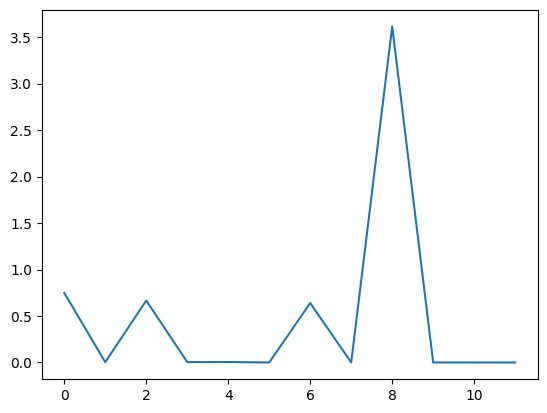

In [179]:
plt.plot(loss_graph)
plt.show()

## Evaluate the RNN Model

In [180]:
num_crrct = 0
model.eval()
for i, (x, y) in enumerate(test_data):
  with torch.no_grad():
    hidden_state = model.init_hidden()
    for char in x:
      y_pred, hidden_state = model(char, hidden_state)
    value, indices = torch.max(y_pred, dim = 1)
    # print(indices)
    if bool(y == indices):
      print("ji", value, y)
      num_crrct +=1
print(f"Accuracy: {(num_crrct/len(test_data))*100}")

ji tensor([5.5247]) tensor([9])
ji tensor([4.5316]) tensor([12])
ji tensor([5.3681]) tensor([2])
ji tensor([7.3265]) tensor([2])
ji tensor([2.9155]) tensor([2])
ji tensor([14.9880]) tensor([10])
ji tensor([5.5192]) tensor([10])
ji tensor([5.9180]) tensor([2])
ji tensor([4.3057]) tensor([10])
ji tensor([7.8062]) tensor([2])
ji tensor([9.1733]) tensor([12])
ji tensor([6.6232]) tensor([2])
ji tensor([8.7490]) tensor([10])
ji tensor([4.7162]) tensor([10])
ji tensor([5.6784]) tensor([10])
ji tensor([5.1997]) tensor([2])
ji tensor([10.2928]) tensor([10])
ji tensor([8.6498]) tensor([10])
ji tensor([4.7525]) tensor([2])
ji tensor([2.8060]) tensor([12])
ji tensor([14.3712]) tensor([10])
ji tensor([7.1210]) tensor([10])
ji tensor([5.4358]) tensor([2])
ji tensor([3.4277]) tensor([10])
ji tensor([5.7179]) tensor([2])
ji tensor([3.6841]) tensor([10])
ji tensor([10.8820]) tensor([10])
ji tensor([7.4132]) tensor([2])
ji tensor([5.1519]) tensor([10])
ji tensor([4.9621]) tensor([2])
ji tensor([2.0848])

In [181]:
!git clone https://github.com/FarshanaFathima/NeuralNetsNotebooks.git

Cloning into 'NeuralNetsNotebooks'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [187]:
!cp /content/drive/MyDrive/RNN_from_scratch.ipynb  /content/NeuralNetsNotebooks/RNN_from_scratch.ipynb

In [197]:
!git add data/

In [190]:
!git config --global user.email "kfarshana@gmail.com"

In [191]:
!git config --global user.name "FarshanaFathima"

In [ ]:
!git commit -m "Adding Dataset"

In [195]:
!cp -r /content/data /content/NeuralNetsNotebooks/data

In [205]:
!git push origin main

remote: Support for password authentication was removed on August 13, 2021.
remote: Please see https://docs.github.com/get-started/getting-started-with-git/about-remote-repositories#cloning-with-https-urls for information on currently recommended modes of authentication.
fatal: Authentication failed for 'https://github.com/FarshanaFathima/NeuralNetsNotebooks.git/'
